In [1]:
import random
import numpy as np
import timeit
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(1.6024511537590769, 2.976368547859863),
 (-22.37877930647643, 64.53711958994819),
 (15.208670026500059, -155.04704382281582),
 (81.0187219202734, -142.85618745640906),
 (-55.537964989197036, 61.13083830735968),
 (83.5177730372435, 133.38021824101025),
 (-65.87690026121936, -99.44579321328155),
 (5.493704632526061, 154.16899913302058),
 (-28.093332027245545, -121.72945065294127),
 (36.62380947218476, 43.77950099954552),
 (-70.97935191695994, -155.9988667892928),
 (-83.40915983045598, -35.31454546358404),
 (-56.16234943356389, 134.0637049727385),
 (-17.23901752286838, -92.6329421827575),
 (-32.78573787052799, 96.520613388534),
 (43.77645115972143, -119.8591219996504),
 (-53.60437045476995, -30.445274436561675),
 (-36.47556390476563, 102.66312268469625),
 (1.1753858331783533, 92.61762638019837),
 (6.480355241461993, -86.04591152409536),
 (68.30585220032523, -2.053114088872576),
 (86.90087155667086, -177.1208445739158),
 (-27.666711990502726, 154.53265350445395),
 (82.58659659811033, 151

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [5]:
#We will need to do the following:
#Import our dependencies and initialize counters and an empty list that will hold the weather data.
#Loop through the cities list.
#Group the cities in sets of 50 to log the process as we find the weather data for each city.
#Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
#Build the city_url or endpoint for each city.
#Log the URL and the record and set numbers.
#Make an API request for each city.
#Parse the JSON weather data for the following:
#City, country, and date
#Latitude and longitude
#Maximum temperature
#Humidity
#Cloudiness
#Wind speed
#Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dc8faf333882de7d50c8a5a8f4705739


In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

    

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yenagoa
Processing Record 2 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | aklavik
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | kavieng
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | irbil
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | huarmey
Processing Record 15 of Set 1 | geraldton
Processing Record 16 of Set 1 | redmond
Processing Record 17 of Set 1 | chuy
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | meulaboh
Processing Record 20 of Set 1 | buenos aires
Processing Record 21 of Set 1 | k

Processing Record 41 of Set 4 | seoul
Processing Record 42 of Set 4 | verkhnevilyuysk
Processing Record 43 of Set 4 | muravlenko
Processing Record 44 of Set 4 | borama
City not found. Skipping...
Processing Record 45 of Set 4 | saint george
Processing Record 46 of Set 4 | bulgan
Processing Record 47 of Set 4 | arraial do cabo
Processing Record 48 of Set 4 | aguas vermelhas
Processing Record 49 of Set 4 | saldanha
Processing Record 50 of Set 4 | sogdiondon
City not found. Skipping...
Processing Record 1 of Set 5 | shirvan
Processing Record 2 of Set 5 | ngunguru
Processing Record 3 of Set 5 | saint-philippe
Processing Record 4 of Set 5 | omsukchan
Processing Record 5 of Set 5 | caorle
Processing Record 6 of Set 5 | faanui
Processing Record 7 of Set 5 | altay
Processing Record 8 of Set 5 | snezhnogorsk
Processing Record 9 of Set 5 | halalo
City not found. Skipping...
Processing Record 10 of Set 5 | pisco
Processing Record 11 of Set 5 | derzhavinsk
Processing Record 12 of Set 5 | sataua
Ci

Processing Record 28 of Set 8 | fukue
Processing Record 29 of Set 8 | qianan
Processing Record 30 of Set 8 | kushiro
Processing Record 31 of Set 8 | bubaque
Processing Record 32 of Set 8 | buraydah
Processing Record 33 of Set 8 | salalah
Processing Record 34 of Set 8 | novolvovsk
City not found. Skipping...
Processing Record 35 of Set 8 | goderich
Processing Record 36 of Set 8 | hobyo
Processing Record 37 of Set 8 | soyaux
Processing Record 38 of Set 8 | matay
Processing Record 39 of Set 8 | berlin
Processing Record 40 of Set 8 | karpogory
Processing Record 41 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 42 of Set 8 | namibe
Processing Record 43 of Set 8 | muswellbrook
Processing Record 44 of Set 8 | rawson
Processing Record 45 of Set 8 | kirensk
Processing Record 46 of Set 8 | show low
Processing Record 47 of Set 8 | vaovai
City not found. Skipping...
Processing Record 48 of Set 8 | sungaipenuh
Processing Record 49 of Set 8 | bandarbeyla
Processing Record 50 of Se

City not found. Skipping...
Processing Record 18 of Set 12 | lucapa
Processing Record 19 of Set 12 | lichinga
Processing Record 20 of Set 12 | inuvik
Processing Record 21 of Set 12 | dahod
Processing Record 22 of Set 12 | kandrian
Processing Record 23 of Set 12 | toppenish
Processing Record 24 of Set 12 | ust-nera
Processing Record 25 of Set 12 | lorengau
Processing Record 26 of Set 12 | kutum
Processing Record 27 of Set 12 | cordele
Processing Record 28 of Set 12 | san vicente
Processing Record 29 of Set 12 | fredericksburg
Processing Record 30 of Set 12 | rio gallegos
Processing Record 31 of Set 12 | banswada
Processing Record 32 of Set 12 | salekhard
Processing Record 33 of Set 12 | petropavlovka
Processing Record 34 of Set 12 | dolbeau
City not found. Skipping...
Processing Record 35 of Set 12 | sabzevar
Processing Record 36 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 37 of Set 12 | antofagasta
Processing Record 38 of Set 12 | broome
Processing Record 39 of S

In [8]:
len(city_data)

562

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yenagoa,4.92,6.26,75.67,93,76,1.43,NG,2020-02-19 04:43:46
1,Hilo,19.73,-155.09,78.80,54,75,5.82,US,2020-02-19 04:43:46
2,Aklavik,68.22,-135.01,14.00,66,75,5.82,CA,2020-02-19 04:43:47
3,Punta Arenas,-53.15,-70.92,48.20,57,75,27.51,CL,2020-02-19 04:42:28
4,Kavieng,-2.57,150.80,83.73,75,61,10.25,PG,2020-02-19 04:43:48
5,Rikitea,-23.12,-134.97,78.85,78,1,14.81,PF,2020-02-19 04:43:48
6,Irbil,36.19,44.01,50.00,87,40,6.93,IQ,2020-02-19 04:43:49
7,Mataura,-46.19,168.86,62.01,69,70,11.99,NZ,2020-02-19 04:43:49
8,Ushuaia,-54.80,-68.30,46.40,81,75,27.51,AR,2020-02-19 04:43:49
9,New Norfolk,-42.78,147.06,66.00,51,75,21.92,AU,2020-02-19 04:43:50


In [10]:
#reorder columns
new_order_columns = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_order_columns]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yenagoa,NG,2020-02-19 04:43:46,4.92,6.26,75.67,93,76,1.43
1,Hilo,US,2020-02-19 04:43:46,19.73,-155.09,78.80,54,75,5.82
2,Aklavik,CA,2020-02-19 04:43:47,68.22,-135.01,14.00,66,75,5.82
3,Punta Arenas,CL,2020-02-19 04:42:28,-53.15,-70.92,48.20,57,75,27.51
4,Kavieng,PG,2020-02-19 04:43:48,-2.57,150.80,83.73,75,61,10.25
5,Rikitea,PF,2020-02-19 04:43:48,-23.12,-134.97,78.85,78,1,14.81
6,Irbil,IQ,2020-02-19 04:43:49,36.19,44.01,50.00,87,40,6.93
7,Mataura,NZ,2020-02-19 04:43:49,-46.19,168.86,62.01,69,70,11.99
8,Ushuaia,AR,2020-02-19 04:43:49,-54.80,-68.30,46.40,81,75,27.51
9,New Norfolk,AU,2020-02-19 04:43:50,-42.78,147.06,66.00,51,75,21.92


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'02/18/20'

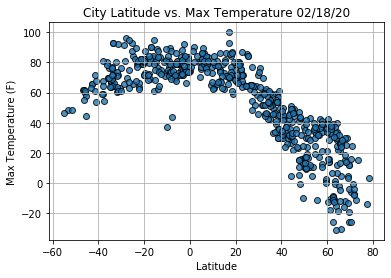

In [14]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

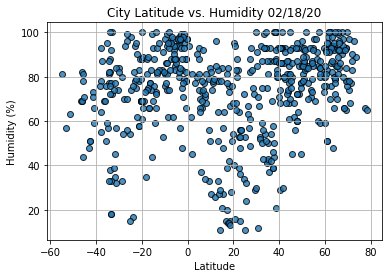

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

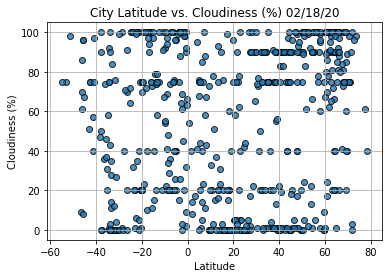

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

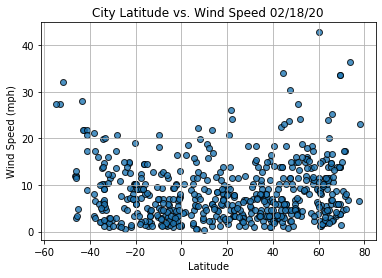

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()